In [1]:
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:>

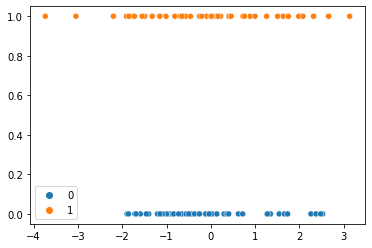

In [8]:
from sklearn.datasets import make_classification
import seaborn as sns

X, y = make_classification(n_samples=100, n_redundant=0, n_informative=2, n_features=2, class_sep=1.0,
                           n_clusters_per_class=2, flip_y=0)

sns.scatterplot(x=X[:,0], y=y, hue=y)

In [6]:
from sklearn.metrics import confusion_matrix

class logistic_regressor:
    def __init__(self, learning_rate=0.01, iterations=100, reg=0.01, early_stop=0.01):
        self.w = 0
        self.b = 0
        self.X = 0
        self.y = 0
        self.n = 0
        self.iterations = iterations
        self.alpha = learning_rate
        self.reg = reg
        

    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
   
    def fit(self, X, y, verbose=False, visualize=False, crisp=True):
        
        self.X = X
        self.y = y
        self.n = y.shape[0]
        self.w = np.random.rand((self.X.shape[1]))
        
        last_loss = 0
        
        z = self.w * self.X + self.b
        
        for i in range(self.iterations):
            
            cur_loss = self.calc_loss(self.X)
            if np.abs(cur_loss - last_loss) < 0.01:
                print(f"Stopping early as minima has been reached")
                break
            last_loss = cur_loss
            
            if verbose and i%(self.iterations//5)==0:
                print(f"Iteration {i} loss:{cur_loss:.3f}")
                
            a = self.predict(self.X)
            dz = a - y
            dw = np.dot(self.X.T, dz)/self.n
            db = np.sum(dz)/self.n
            self.w -= self.alpha * dw
            self.b -= self.alpha * db
            
        print(f"\n\nModel Trained on {self.n} data points, total iterations {i+1} with final loss {self.calc_loss(self.X):.3f}")
        
        if visualize:            
            min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
            min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
            
            x1grid = np.arange(min1, max1, 0.1)
            x2grid = np.arange(min2, max2, 0.1)
            
            xx, yy = np.meshgrid(x1grid, x2grid)
            
            r1, r2 = xx.flatten(), yy.flatten()
            r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
            
            grid = np.hstack((r1,r2))
           
            yhat = self.predict(grid) if not crisp else np.array([1 if x > 0.5 else 0 for x in self.predict(grid)])
            
            zz = yhat.reshape(xx.shape)
            
            plt.contourf(xx, yy, zz, cmap='Paired')
            sns.scatterplot(x=X[:,0], y=X[:,1], hue=self.y, cmap='Paired')   
            
    def predict(self, X):
        return self.sigmoid(np.sum(self.w.T * X, axis=1) + self.b)

    
    def accuracy(self, X, y):
        yhat = np.array([1 if x > 0.5 else 0 for x in self.predict(X)])
        return np.sum(yhat == y) / len(X)
    
    def confusion_matrix(self, X, y):
        yhat = np.array([1 if x > 0.5 else 0 for x in self.predict(X)])
        return confusion_matrix(y, yhat)
        
    def calc_loss(self, X):
        a = self.predict(X)
        return np.sum(-(self.y * np.log(a) + (1 - self.y) * np.log(1 - a)))

Iteration 0 loss:50.965
Iteration 200 loss:42.249
Stopping early as minima has been reached


Model Trained on 100 data points, total iterations 393 with final loss 39.428


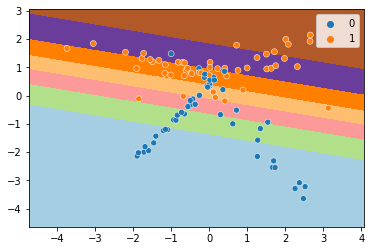

In [15]:
reg = logistic_regressor(iterations=1000)
reg.fit(X, y, verbose=True, visualize=True, crisp=False)

<AxesSubplot:>

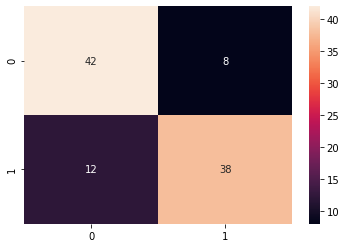

In [193]:
conf = reg.confusion_matrix(X, y)
sns.heatmap(conf, annot=True)

In [190]:
reg.accuracy(X, y)

0.8

array([False,  True, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True,  True, False,  True, False,  True,
        True, False, False,  True,  True,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True, False,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False, False,
        True, False,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True, False, False,  True,
        True])